In [2]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2
# ,renorm
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
import sympy
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

In [2]:
sympy.__version__

'1.8'

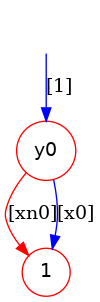

In [3]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()
# ts2=Tensor(U,var)

In [4]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()
# Clear_TDD()

IndexError: list assignment index out of range

-------------
0.707107*xn0
[0.707107*xn0]
-------------
-------------
0.707107*x0
[0.707107*x0]
-------------
-------------
0.707107*x0 + 0.707107*xn0
[0.707107*x0 + 0.707107*xn0]
-------------
-------------
-0.707107*x0
[-0.707107*x0]
-------------
-------------
-0.707107*x0 + 0.707107*xn0
[-0.707107*x0 + 0.707107*xn0]
-------------
-------------
I*x1
[1.0*I*x1]
-------------
-------------
0.707107*xn1
[0.707107*xn1]
-------------
-------------
0.707107*x1
[0.707107*x1]
-------------
-------------
0.707107*x1 + 0.707107*xn1
[0.707107*x1 + 0.707107*xn1]
-------------
-------------
-0.707107*x1
[-0.707107*x1]
-------------
-------------
-0.707107*x1 + 0.707107*xn1
[-0.707107*x1 + 0.707107*xn1]
-------------
-------------
0.707107*xn1
[0.707107*xn1]
-------------
-------------
0.707107*I*x1
[0.707107*I*x1]
-------------
-------------
0.707107*I*x1 + 0.707107*xn1
[0.707107*I*(x1 - I*xn1)]
-------------
-------------
-0.707107*I*x1
[-0.707107*I*x1]
-------------
-------------
-0.707107*I*x

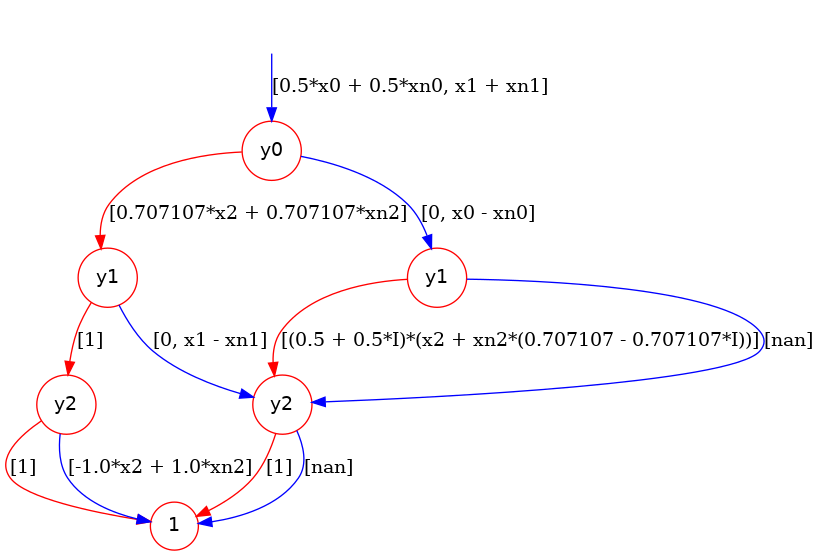

In [ ]:
path='Benchmarks/'
file_name='qft_3.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(3):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)

## bug...occurs
tdd=tn.cont()

# tdd=renorm(tdd)
tdd.show()

In [ ]:
A=['x0','xn0','c0','x1','xn1','c1','x2','xn2','c2']
[x0,xn0,c0,x1,xn1,c1,x2,xn2,c2]=symbols(A)
s=[]
s.append((x0+c0*xn0)*(x1+c1*xn1)*(x2+c2*xn2))
print(type(s[-1]))
print('s:',s[-1])

print('--------------------------loop1--------------------------')
fx01=sympy.Poly(s[-1],x0).coeffs()[0]
fx00=sympy.Poly(s[-1],xn0).coeffs()[0]
print('f|x0=1=>coeff x0 :',fx01)
print('f|x0=0=>coeff xn0 :',fx00)
c0p=sympy.simplify(sympy.Poly(s[-1],xn0).coeffs()[0]/sympy.Poly(s[-1],x0).coeffs()[0])
print('c0=',c0p)
s[0]=x0+c0p*xn0
s.append(fx01)
print(s)
print('--------------------------loop2--------------------------')
fx11=sympy.Poly(s[-1],x1).coeffs()[0]
fx10=sympy.Poly(s[-1],xn1).coeffs()[0]
print('f|x1=1=>coeff x1 :',fx11)
print('f|x1=0=>coeff xn1 :',fx10)
c1p=sympy.simplify(sympy.Poly(s[-1],xn1).coeffs()[0]/sympy.Poly(s[-1],x1).coeffs()[0])
print('c1=',c1p)
s[1]=x1+c1p*xn1
s.append(fx11)
print(s)


<class 'sympy.core.mul.Mul'>
s: (c0*xn0 + x0)*(c1*xn1 + x1)*(c2*xn2 + x2)
--------------------------loop1--------------------------
f|x0=1=>coeff x0 : c1*c2*xn1*xn2 + c1*x2*xn1 + c2*x1*xn2 + x1*x2
f|x0=0=>coeff xn0 : c0*c1*c2*xn1*xn2 + c0*c1*x2*xn1 + c0*c2*x1*xn2 + c0*x1*x2
c0= c0
[c0*xn0 + x0, c1*c2*xn1*xn2 + c1*x2*xn1 + c2*x1*xn2 + x1*x2]
--------------------------loop2--------------------------
f|x1=1=>coeff x1 : c2*xn2 + x2
f|x1=0=>coeff xn1 : c1*c2*xn2 + c1*x2
c1= c1
[c0*xn0 + x0, c1*xn1 + x1, c2*xn2 + x2]


In [49]:
A=['x0','xn0','x1','xn1','x2','xn2','x3','xn3','x4','xn4','x5','xn5']
[x0,xn0,x1,xn1,x2,xn2,x3,xn3,x4,xn4,x5,xn5]=sympy.symbols(A)
weight=2
expr=weight*(x0+0*xn0)*(x1+1*xn1)*(3*x2+2*xn2)*(xn4)*(x5+xn5)

symbol_list=list(expr.free_symbols)
# symbol_list = sorted(symbol_list, key = lambda e : e.name)
order_dic={}
symbol_dic={}
using_qubit_list=[]
res=[1,[]]
for i , element in enumerate(symbol_list):
    order_dic[element.name]=i 
    symbol_dic[element.name]=element
    qubit_label=int(element.name.replace('x','').replace('n',''))

    if qubit_label not in using_qubit_list:
        using_qubit_list.append(qubit_label)
        # print(qubit_label)
    using_qubit_list=sorted(using_qubit_list)
# print(order_dic)
# print(symbol_dic)
# print(using_qubit_list)    
for i in using_qubit_list:
    if 'x%i'%i in order_dic.keys() and 'xn%i'%i in order_dic.keys():
        # print('x11:'+str(i))

        fx1=sympy.Poly(expr,symbol_dic['x%i'%i]).coeffs()[0]
        fx0=sympy.Poly(expr,symbol_dic['xn%i'%i]).coeffs()[0]
        c=sympy.simplify(fx0/fx1)
            
        Factor=symbol_dic['x%i'%i]+c*symbol_dic['xn%i'%i]
        expr=sympy.simplify(expr/Factor)
        if c!=1:
           res[1].append(Factor)

    elif 'x%i'%i in order_dic.keys():
        # print('x1:'+str(i))
        Factor=symbol_dic['x%i'%i]
        res[1].append(Factor)
        expr=sympy.simplify(expr/Factor)
    elif 'xn%i'%i in order_dic.keys():
        # print('x0:'+str(i))
        Factor=symbol_dic['xn%i'%i]
        res[1].append(Factor)
        expr=sympy.simplify(expr/Factor)
res[0]=expr

print(res)


[6, [x0, x2 + 2*xn2/3, xn4]]


In [50]:
def normal_form(expr):
    '''
    The goal of this code is want to turn 'Psudo Boolean fuanction' into 'Normal_form'.
    
    input: 
        expr: Psudo Boolean fuanction.
    output:
        res: Normal_form 
            [weight,[x_1+c_1*x1_n,...,x_n+c_n*xn_n]]
    '''
    symbol_list=list(expr.free_symbols)
    order_dic={}
    symbol_dic={}
    using_qubit_list=[]
    res=[1,[]]
    for i , element in enumerate(symbol_list):
        order_dic[element.name]=i 
        symbol_dic[element.name]=element
        qubit_label=int(element.name.replace('x','').replace('n',''))

        if qubit_label not in using_qubit_list:
            using_qubit_list.append(qubit_label)
            # print(qubit_label)
        using_qubit_list=sorted(using_qubit_list)
    # print(order_dic)
    # print(symbol_dic)
    # print(using_qubit_list)    
    for i in using_qubit_list:
        if 'x%i'%i in order_dic.keys() and 'xn%i'%i in order_dic.keys():
            # print('x11:'+str(i))
            fx1=sympy.Poly(expr,symbol_dic['x%i'%i]).coeffs()[0]
            fx0=sympy.Poly(expr,symbol_dic['xn%i'%i]).coeffs()[0]
            c=sympy.simplify(fx0/fx1)
            Factor=symbol_dic['x%i'%i]+c*symbol_dic['xn%i'%i]
            expr=sympy.simplify(expr/Factor)
            if c!=1:
                res[1].append(Factor)
        elif 'x%i'%i in order_dic.keys():
            # print('x1:'+str(i))
            Factor=symbol_dic['x%i'%i]
            res[1].append(Factor)
            expr=sympy.simplify(expr/Factor)
        elif 'xn%i'%i in order_dic.keys():
            # print('x0:'+str(i))
            Factor=symbol_dic['xn%i'%i]
            res[1].append(Factor)
            expr=sympy.simplify(expr/Factor)
    res[0]=expr

    # print(res)
    return res

In [52]:
A=['x0','xn0','x1','xn1','x2','xn2','x3','xn3','x4','xn4','x5','xn5']
[x0,xn0,x1,xn1,x2,xn2,x3,xn3,x4,xn4,x5,xn5]=sympy.symbols(A)
weight=2
expr=weight*(x0+0*xn0)*(x1+1*xn1)*(3*x2+2*xn2)*(xn4)*(x5+5*xn5)
normal_form(expr)

[6, [x0, x2 + 2*xn2/3, xn4, x5 + 5*xn5]]

In [5]:
# A=['x0','xn0','x1','xn1','x2','xn2','x3','xn3','x4','xn4']
# [x0,xn0,x1,xn1,x2,xn2,x3,xn3,x4,xn4]=sympy.symbols(A)


# expr=(x0+1*xn0)*(x1+2*xn1)*(x2+3*xn2)*(x3)*(xn4)

# x_list=list(expr.free_symbols)
# x_list = sorted(x_list, key = lambda e : e.name)
# # print(x_list)

# fx={}
# for i, element in enumerate(x_list):
#     fx[element.name]=sympy.Poly(expr,element).coeffs()[0]
#     print(i,element.name)

# xn_list = [e for e in x_list if e.name[1]=='n']
# for e in xn_list :
#     x_list.remove(e)
# # print(x_list,xn_list)

# print(fx.keys())

# output_dict={}
# for i in range (len(x_list)):
#     qubit_label=x_list[i].name.replace('x','')
#     if 'xn%s'%qubit_label in fx.keys():
#         # print('xn%s'%qubit_label)
#         # print('x%s'%qubit_label)
#         c=sympy.simplify(fx['xn%s'%qubit_label]/fx['x%s'%qubit_label])
#         output_dict[qubit_label]=x_list[i]+c

# print(output_dict)

# #     element=free_symbols[i].name.replace('x','')
# #     print('xn%i'%int(element))
# #     if 'xn%i'%int(element) in fx.keys():
# #         print('1')

# # print(fx)

# # for i in range (3):
# #     fx1=sympy.Poly(s[-1],x[i]).coeffs()[0]
# #     fx0=sympy.Poly(s[-1],xn[i]).coeffs()[0]
# #     cp=sympy.simplify(fx0/fx1)
# #     s[i]=x[i]+cp*xn[i]
# #     if not fx1==1:
# #         s.append(fx1)
# # print(s)




0 x0
1 x1
2 x2
3 x3
4 xn0
5 xn1
6 xn2
7 xn4
dict_keys(['x0', 'x1', 'x2', 'x3', 'xn0', 'xn1', 'xn2', 'xn4'])
{'0': x0 + 1, '1': x1 + 2, '2': x2 + 3}


In [6]:
def Primary_Normal_Norm(expr, qubit_num=5):
    '''
    The goal of this code is want to turn 'Psudo Boolean fuanction' into 'Primary_Normal_Norm'.

    expr: Psudo Boolean fuanction.
    qubit_num: Qubit number.

    '''
    x=[]
    xn=[]
    res=[expr]
    
    for i in range(qubit_num):
        x.append(sympy.symbols('x%i'%i))
        xn.append(sympy.symbols('xn%i'%i))
    
    for i in range (qubit_num):
        fx1=sympy.Poly(res[-1],x[i]).coeffs()[0]
        fx0=sympy.Poly(res[-1],xn[i]).coeffs()[0]
        cp=sympy.simplify(fx0/fx1)
        res[i]=x[i]+cp*xn[i]
        if not fx1==1:
            res.append(fx1)
    return res

In [7]:
A=['x0','xn0','c0','x1','xn1','c1','x2','xn2','c2']
[x0,xn0,c0,x1,xn1,c1,x2,xn2,c2]=symbols(A)
s=(x0+c0*xn0)*(x1+c1*xn1)*(x2+c2*xn2)
Primary_Normal_Norm(s,3)

[c0*xn0 + x0, c1*xn1 + x1, c2*xn2 + x2]

In [13]:
A=['x0','xn0','x1','xn1']
[x0,xn0,x1,xn1]=symbols(A)
s=470832*I*(-x0 + xn0)*(x1 - I*xn1)/665857
# type(s)
#help(factor_list)
print(factor_list(s, gaussian=True))
print(factor_list(s, extension=[I]))


(-470832*I/665857, [(x1 - I*xn1, 1), (x0 - xn0, 1)])
(-470832*I/665857, [(x0 - xn0, 1), (x1 - I*xn1, 1)])


In [ ]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=2*x+3*nx+2*x*y+3*nx*y+2*x*ny+3*nx*ny+(0.0000001+0.0000001*I)*nx
print(type(s))
sympy.Poly(nsimplify(s,tolerance=1e-6,rational=False),x).coeffs()
# print(s)
# t=to_cnf2(s,n=2)
# print(t)


<class 'sympy.core.add.Add'>


[2*x2 + 2*xn2 + 2, 3*x2*xn1 + 3*xn1*xn2 + 3*xn1]

In [ ]:
x=symbols('x1')
nx=symbols('xn1')
y=symbols('x2')
ny=symbols('xn2')
s=float('%.4f'%np.sqrt(2))*x+I*y
# s=nsimplify(s,tolerance=1e-4,rational=False)
s

1.4142*x1 + I*x2

In [ ]:
a=np.sqrt(2)*I+1
b=np.sqrt(2)
print(type(a))
print(f'{complex(a)=:.3f}')
print(complex(a))

'({0.real:.4f} + {0.imag:.4f}i)'.format(complex(a))
ca = complex(a)
ca_real, ca_imag = ca.real, ca.imag
print(ca_real, ca_imag)
# print(type(b))
# print(complex(b))
# print(type(complex(b)))



<class 'sympy.core.add.Add'>
complex(a)=1.000+1.414j
(1+1.4142135623730951j)
1.0 1.4142135623730951
